In [20]:
import os, math
from IPython.display import Image
import numpy as np
seed = np.random.seed
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [21]:
df = pd.read_csv('Dataset_spine.csv')
df = df.drop(['Unnamed: 13'], axis=1)

In [22]:
display(df)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [23]:
y = pd.factorize(df['Class_att'])[0]
features = df.iloc[:,:12]
features = pd.get_dummies(features)
x = features.values

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=0)

In [25]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [26]:
enc =OneHotEncoder()
yy = y.reshape(-1,1)
enc.fit(yy)
yy_hot_full = enc.transform(yy).toarray()

y_train_enc = y_train.reshape(-1,1)
enc.fit(y_train_enc)
y_enc_train = enc.transform(y_train_enc).toarray()

y_test_enc = y_train.reshape(-1,1)
enc.fit(y_test_enc)
y_enc_test = enc.transform(y_test_enc).toarray()

In [27]:
mlp.out_activation = 'softmax'

In [28]:
mlp.fit(x_train, y_train)

Iteration 1, loss = 4.13790158
Iteration 2, loss = 8.98318592
Iteration 3, loss = 0.64788648
Iteration 4, loss = 1.60175522
Iteration 5, loss = 0.46492848
Iteration 6, loss = 1.03785972
Iteration 7, loss = 0.51800668
Iteration 8, loss = 0.34897815
Iteration 9, loss = 0.52353965
Iteration 10, loss = 0.32944632
Iteration 11, loss = 0.32876599
Iteration 12, loss = 0.31803631
Iteration 13, loss = 0.31273560
Iteration 14, loss = 0.30389611
Iteration 15, loss = 0.30566930
Iteration 16, loss = 0.32666457
Iteration 17, loss = 0.31110049
Iteration 18, loss = 0.33203697
Iteration 19, loss = 0.30322197
Iteration 20, loss = 0.30423760
Iteration 21, loss = 0.28662542
Iteration 22, loss = 0.28933144
Iteration 23, loss = 0.28627496
Iteration 24, loss = 0.28805089
Iteration 25, loss = 0.30795577
Iteration 26, loss = 0.29515966
Iteration 27, loss = 0.27673197
Iteration 28, loss = 0.29317344
Iteration 29, loss = 0.27899893
Iteration 30, loss = 0.27836916
Iteration 31, loss = 0.27617742
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=500, random_state=21,
              solver='sgd', tol=1e-09, verbose=10)

In [29]:
print("Training set score: %f" % mlp.score(x_train, y_train))
print("Test set score: %f" % mlp.score(x_test, y_test))

Training set score: 0.896552
Test set score: 0.794872


In [30]:
parameters = {'learning_rate_init': (0.1, 0.01, 0.01),
             'hidden_layer_sizes': (20, 50, 100),
             'solver': ('lbfgs', 'sgd', 'adam')}

In [31]:
clf = GridSearchCV(mlp, parameters)
X_enc_train = x
X_enc_test = x

In [32]:
clf.fit(x, y)

7, loss = 0.38193378
Iteration 28, loss = 0.38298360
Iteration 29, loss = 0.38427451
Iteration 30, loss = 0.37563623
Iteration 31, loss = 0.37449879
Iteration 32, loss = 0.39911745
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 5.37318202
Iteration 2, loss = 6.90616078
Iteration 3, loss = 0.52909579
Iteration 4, loss = 0.54623334
Iteration 5, loss = 0.48584022
Iteration 6, loss = 0.45714447
Iteration 7, loss = 0.44466389
Iteration 8, loss = 0.42321604
Iteration 9, loss = 0.42120785
Iteration 10, loss = 0.41739908
Iteration 11, loss = 0.56268726
Iteration 12, loss = 0.43848216
Iteration 13, loss = 0.40325155
Iteration 14, loss = 0.41022019
Iteration 15, loss = 0.39514797
Iteration 16, loss = 0.39863470
Iteration 17, loss = 0.39832428
Iteration 18, loss = 0.38188577
Iteration 19, loss = 0.37761879
Iteration 20, loss = 0.39747052
Iteration 21, loss = 0.40101626
Iteration 22, loss = 0.38215935
Iteration 23, loss = 0.37004916
It

GridSearchCV(estimator=MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                                     max_iter=500, random_state=21,
                                     solver='sgd', tol=1e-09, verbose=10),
             param_grid={'hidden_layer_sizes': (20, 50, 100),
                         'learning_rate_init': (0.1, 0.01, 0.01),
                         'solver': ('lbfgs', 'sgd', 'adam')})

In [33]:
print("Training set score: %f" % clf.score(X_enc_train, y))
print("Test set score: %f" % clf.score(X_enc_test, y))

Training set score: 0.854839
Test set score: 0.854839


In [34]:
print(clf.best_params_)

{'hidden_layer_sizes': 50, 'learning_rate_init': 0.01, 'solver': 'sgd'}


In [35]:
import seaborn as sns

In [36]:
y_predict = clf.predict(x)

In [37]:
cm = confusion_matrix(y, y_predict)
print(cm)

[[178  32]
 [ 13  87]]


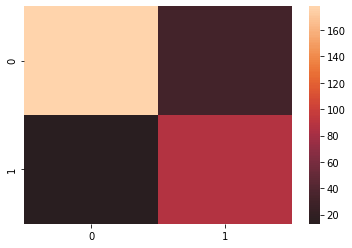

In [38]:
sns.heatmap(cm, center=True)
plt.show()